# Credit Card Fraud Detection

Throughout the financial sector, machine learning algorithms are being developed to detect fraudulent transactions.  In this project, that is exactly what we are going to be doing as well. 

Using a dataset of of nearly 28,500 credit card transactions and multiple unsupervised anomaly detection algorithms, we are going to identify transactions with a high probability of being credit card fraud.

Dataset is from Kaggle or UCI.

Furthermore, using metrics suchs as precision, recall, and F1-scores, we will investigate why the classification accuracy for these algorithms can be misleading.

In addition, we will explore the use of data visualization techniques common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our data set.

Let's get started!

### importing the library

In [1]:
import pandas as pd
import numpy as np
import keras
np.random.seed(2)

C:\Users\SAMEER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### imporing the dataset

In [2]:
data = pd.read_csv("F:\\PROJECT\\7. Credit Card Fraud Detection\\Dataset\\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Applying feature scaling to the dataset

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
data = data.drop(['Time'], axis = 1)

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Visualising the dataset

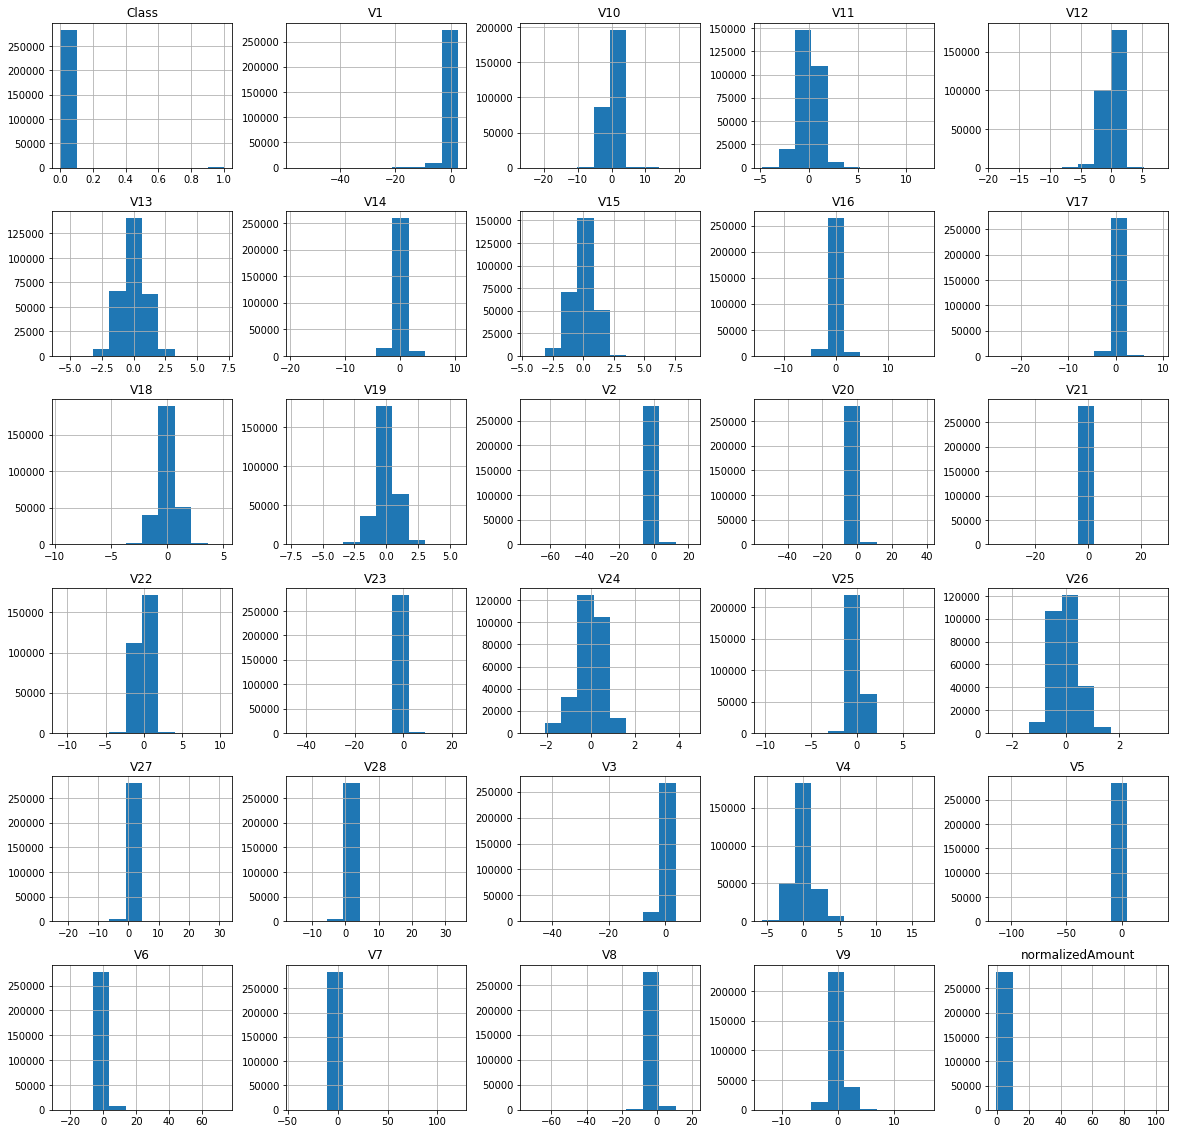

In [56]:
# Plot histograms of each parameter 
import matplotlib.pyplot as plt
data.hist(figsize = (20, 20))
plt.show()

### Checking the Correlation between Variables

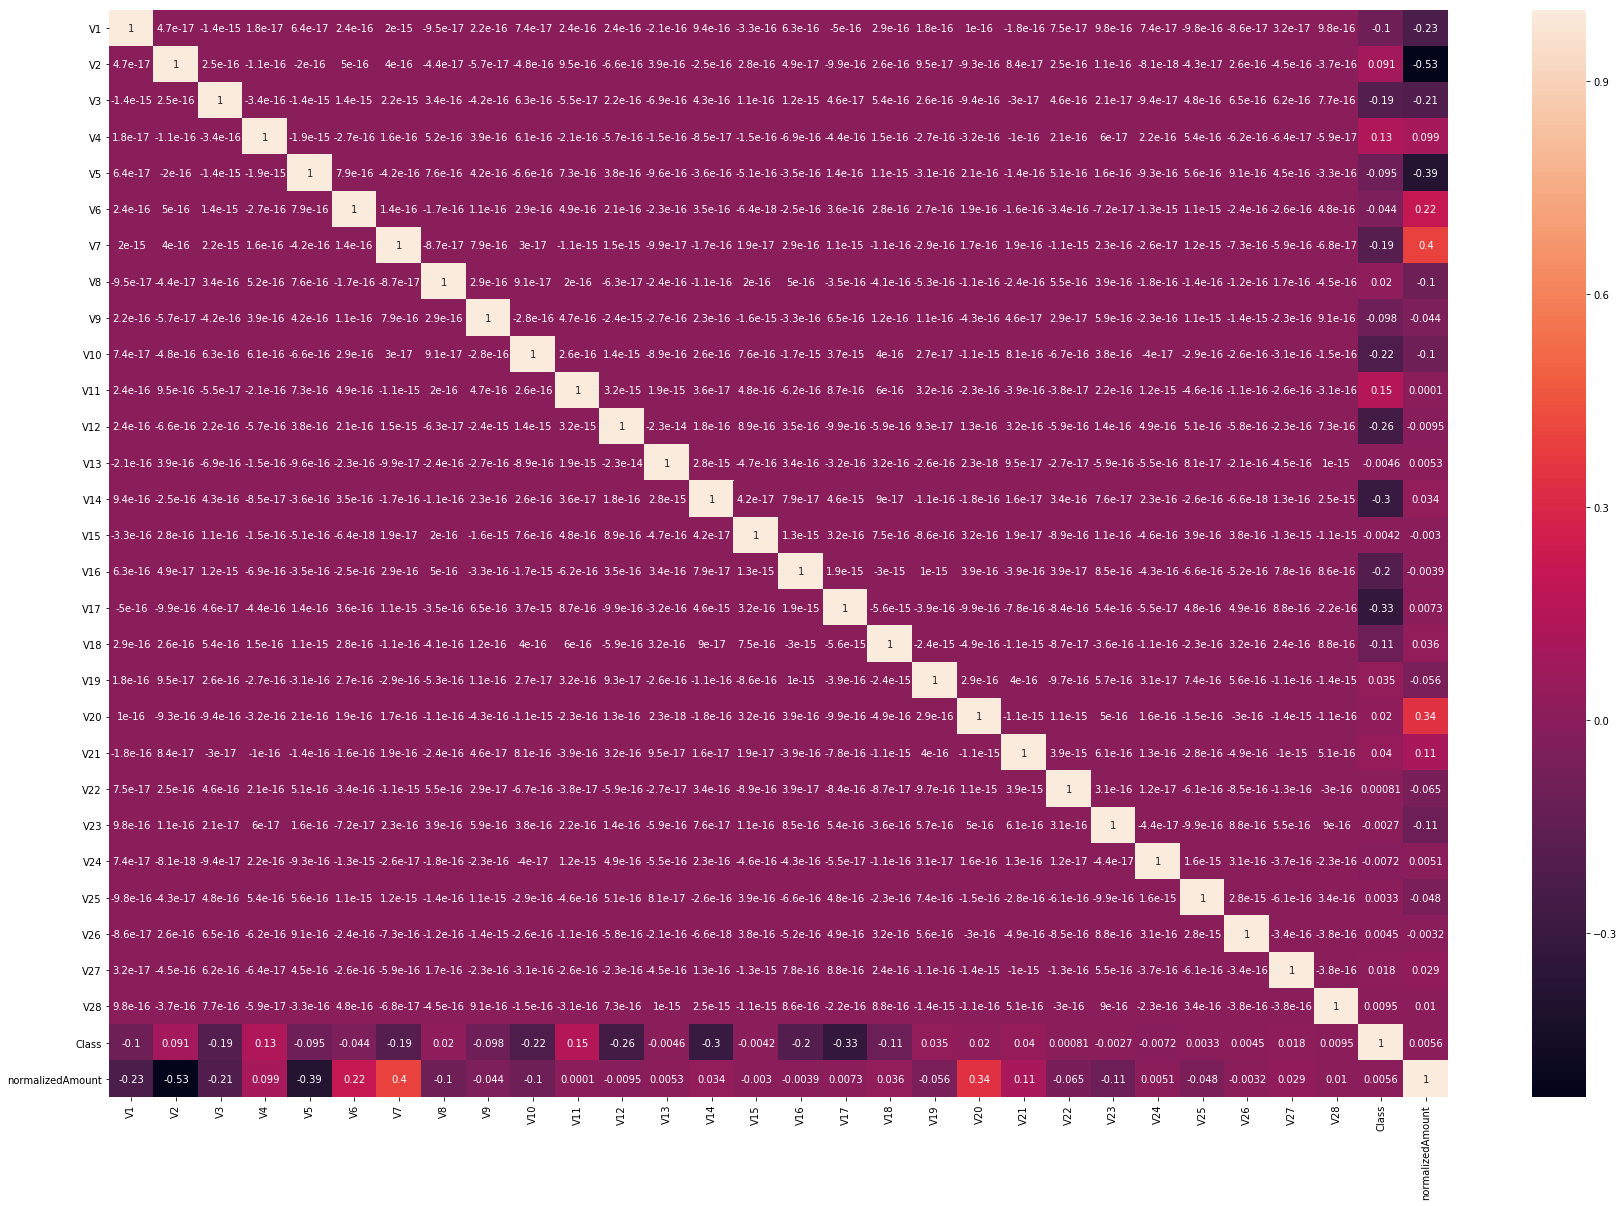

In [10]:
# Strong correlation between the Class, Time, Amount, V2, V3, .........
import seaborn as sns
plt.figure(figsize=(30,20)) 
sns.heatmap(data.corr(), annot=True) 

##### spliting the dataset into X and Y part

In [11]:
X = data.iloc[:, data.columns != 'Class']

In [12]:
Y = data.iloc[:, data.columns == 'Class']

In [13]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


### Spliting the dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

### Importing the library for DeepNeuralNetwork

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#### Intializing the layers

In [18]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation='relu'),
    Dense(units = 24, activation='relu'),
    Dropout(0.5),
    Dense(units = 20, activation='relu'),
    Dense(units = 24, activation='relu'),
    Dense(units = 1, activation='sigmoid'),
])

#### Viewing the Layer's summary

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


##### Fitting the X_train, Y_train to the model.....

In [20]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 15, epochs= 5)

Epoch 1/5
199364/199364 [==============================] - 102s 511us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 98s 494us/step - loss: 0.0040 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 102s 512us/step - loss: 0.0039 - acc: 0.9994ETA: 0s - loss: 0.003
Epoch 4/5
199364/199364 [==============================] - 110s 554us/step - loss: 0.0034 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 99s 495us/step - loss: 0.0035 - acc: 0.99941s - loss: 0.0035 - acc: 0.99 - ETA: 1s - loss:


In [21]:
score = model.evaluate(X_test, Y_test)

85443/85443 [==============================] - 11s 132us/step


In [22]:
print(score)

[0.004829554324226454, 0.9993914071369217]


#### Predicting the result

In [23]:
Y_pred = model.predict(X_test)

In [24]:
Y_pred = (Y_pred > 0.5)

In [25]:
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

#### Applying the confusion metrix for analysis of test result and predicted result

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [27]:
cm

array([[85276,    20],
       [   32,   115]], dtype=int64)

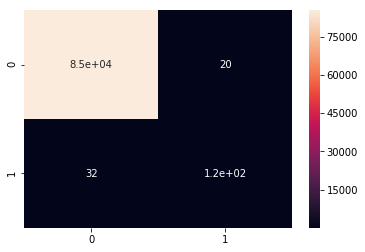

In [28]:
import seaborn as sns
sns.heatmap(cm, annot = True)

### UnderSampling

In [29]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [30]:
normal_indices = data[data.Class == 0].index
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [31]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [32]:
under_sample_data = data.iloc[under_sample_indices,:]

In [33]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class'].values
Y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class'].values

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_undersample,Y_undersample, test_size=0.3)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=15,epochs=10)

Epoch 1/10
688/688 [==============================] - 2s 3ms/step - loss: 0.7029 - acc: 0.9142
Epoch 2/10
688/688 [==============================] - 0s 617us/step - loss: 0.3303 - acc: 0.9302 0s - loss: 0.4266 - acc: 0
Epoch 3/10
688/688 [==============================] - 0s 606us/step - loss: 0.1840 - acc: 0.9375
Epoch 4/10
688/688 [==============================] - 0s 583us/step - loss: 0.1948 - acc: 0.9433
Epoch 5/10
688/688 [==============================] - 0s 606us/step - loss: 0.1682 - acc: 0.9477
Epoch 6/10
688/688 [==============================] - 0s 605us/step - loss: 0.1659 - acc: 0.9433
Epoch 7/10
688/688 [==============================] - 0s 655us/step - loss: 0.1328 - acc: 0.9535
Epoch 8/10
688/688 [==============================] - 0s 583us/step - loss: 0.1312 - acc: 0.9549
Epoch 9/10
688/688 [==============================] - 0s 581us/step - loss: 0.1209 - acc: 0.9608
Epoch 10/10
688/688 [==============================] - 1s 831us/step - loss: 0.1305 - acc: 0.9549


In [37]:
Y_pred = model.predict(X_test)

In [38]:
Y_pred = (Y_pred > 0.5)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

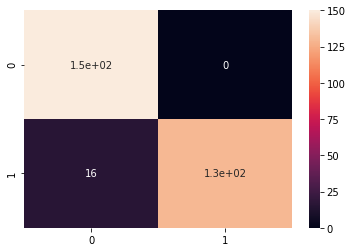

In [40]:
import seaborn as sns
sns.heatmap(cm, annot = True)

### SMOTE (OverSampling)

In [41]:
from imblearn.over_sampling import SMOTE

In [43]:
X_resample, Y_resample = SMOTE().fit_sample(X,Y.values.ravel())

In [44]:
Y_resample = pd.DataFrame(Y_resample)
X_resample = pd.DataFrame(X_resample)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resample,Y_resample,test_size=0.3)

In [46]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 149s 375us/step - loss: 0.0328 - acc: 0.9888
Epoch 2/5
398041/398041 [==============================] - 145s 363us/step - loss: 0.0142 - acc: 0.9963
Epoch 3/5
398041/398041 [==============================] - 139s 349us/step - loss: 0.0117 - acc: 0.9971
Epoch 4/5
398041/398041 [==============================] - 141s 353us/step - loss: 0.0105 - acc: 0.9975
Epoch 5/5
398041/398041 [==============================] - 141s 354us/step - loss: 0.0093 - acc: 0.9979


In [50]:
Y_pred = model.predict(X_test)

In [51]:
Y_pred = (Y_pred > 0.5)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

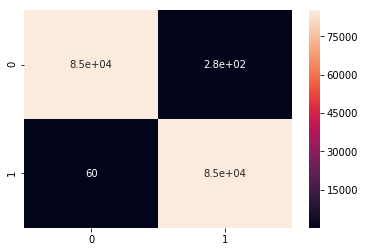

In [53]:
import seaborn as sns
sns.heatmap(cm, annot = True)

### Analyse the result

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       1.00      1.00      1.00     85297

avg / total       1.00      1.00      1.00    170589



##### As we reach to the Accuracy of 99.939% to the test set by using the Deep Neural Network.